**Session-8 31/07/2023**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os

In [ ]:
%cd "D:\Imarticus\stat\house-prices-advanced-regression-techniques"

D:\Imarticus\stat\house-prices-advanced-regression-techniques


In [ ]:
trainhp=pd.read_csv('train.csv')
trainhp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
trainhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
testhp=pd.read_csv('test.csv')
testhp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
testhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
#Temperory add dependent variable into test data
testhp['SalePrice']='test'

In [ ]:
#concatenate both dataframes for preprocessing
combinedf=pd.concat([trainhp,testhp],axis=0)#row wise concationation

In [ ]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
#find missing values
pd.set_option('display.max_rows',81)
combinedf.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
BsmtFinSF1          1
GarageCars          1
GarageArea          1
Exterior2nd         1
BsmtUnfSF           1
Exterior1st         1
SaleType            1
TotalBsmtSF         1
BsmtFinSF2          1
KitchenQual         1
Electrical          1
Fireplaces          0
TotRmsAbvGrd        0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [ ]:
#find missing values in percentage
pd.set_option('display.max_rows',81)
combinedf.isnull().sum().sort_values(ascending=False)/combinedf.shape[0]*100

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
MasVnrType       60.500171
FireplaceQu      48.646797
LotFrontage      16.649538
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
GarageYrBlt       5.447071
GarageType        5.378554
BsmtExposure      2.809181
BsmtCond          2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrArea        0.787941
MSZoning          0.137033
Functional        0.068517
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
Utilities         0.068517
BsmtFinSF1        0.034258
GarageCars        0.034258
GarageArea        0.034258
Exterior2nd       0.034258
BsmtUnfSF         0.034258
Exterior1st       0.034258
SaleType          0.034258
TotalBsmtSF       0.034258
BsmtFinSF2        0.034258
KitchenQual       0.034258
Electrical        0.034258
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
Id                0.000000
B

In [ ]:
#split the data into numeric and object columns
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [ ]:
print(numcols.shape)
print(objcols.shape)

(2919, 37)
(2919, 44)


In [ ]:
objcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [ ]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [ ]:
notavailable=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
              'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [ ]:
len(notavailable)

14

In [ ]:
for col in notavailable:
    objcols[col]=objcols[col].fillna('NotAvailable')

In [ ]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2915 non-null   object
 1   Street         2919 non-null   object
 2   Alley          2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2917 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2918 non-null   object
 16  Exterior2nd    2918 non-null   object
 17  MasVnrType     1153 non-null   object
 18  ExterQual      2919 non-null   ob

In [ ]:
objcols.isnull().sum().sort_values(ascending=False)

MasVnrType       1766
MSZoning            4
Utilities           2
Functional          2
SaleType            1
Electrical          1
KitchenQual         1
Exterior2nd         1
Exterior1st         1
FireplaceQu         0
Heating             0
HeatingQC           0
CentralAir          0
GarageType          0
BsmtFinType1        0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC              0
Fence               0
MiscFeature         0
SaleCondition       0
BsmtFinType2        0
BsmtCond            0
BsmtExposure        0
Condition2          0
Alley               0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Street              0
HouseStyle          0
RoofStyle           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
SalePrice           0
dtype: int64

In [ ]:
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
#idxmax() identifies the class or index of maximum frequency in value_counts().

In [ ]:
objcols.isnull().sum().sort_values(ascending=False)

MSZoning         0
Street           0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SalePrice        0
dtype: int64

In [ ]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2919 non-null   object
 1   Street         2919 non-null   object
 2   Alley          2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2919 non-null   object
 16  Exterior2nd    2919 non-null   object
 17  MasVnrType     2919 non-null   object
 18  ExterQual      2919 non-null   ob

In [ ]:
#checking null values and null_values count
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [ ]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
categeorycols=numcols[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']]

In [ ]:
numcols=numcols.drop(['OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],axis=1)

In [ ]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Id                 0
WoodDeckSF         0
ScreenPorch        0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
TotRmsAbvGrd       0
PoolArea           0
Fireplaces         0
FullBath           0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
LotArea            0
MiscVal            0
dtype: int64

In [ ]:
#missing values impetation
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [ ]:
numcols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   int64  
 10  2ndFlrSF       2919 non-null   int64  
 11  LowQualFinSF   2919 non-null   int64  
 12  GrLivArea      2919 non-null   int64  
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   int64  
 16  HalfBath       2919 non-null   int64  
 17  BedroomAbvGr   2919 non-null   int64  
 18  KitchenAbvGr 

In [ ]:
for col in categeorycols.columns:
    categeorycols[col]=categeorycols[col].fillna(categeorycols[col].median())

In [ ]:
categeorycols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   OverallCond   2919 non-null   int64  
 2   YearBuilt     2919 non-null   int64  
 3   YearRemodAdd  2919 non-null   int64  
 4   GarageYrBlt   2919 non-null   float64
 5   MoSold        2919 non-null   int64  
 6   YrSold        2919 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 182.4 KB


<Axes: >

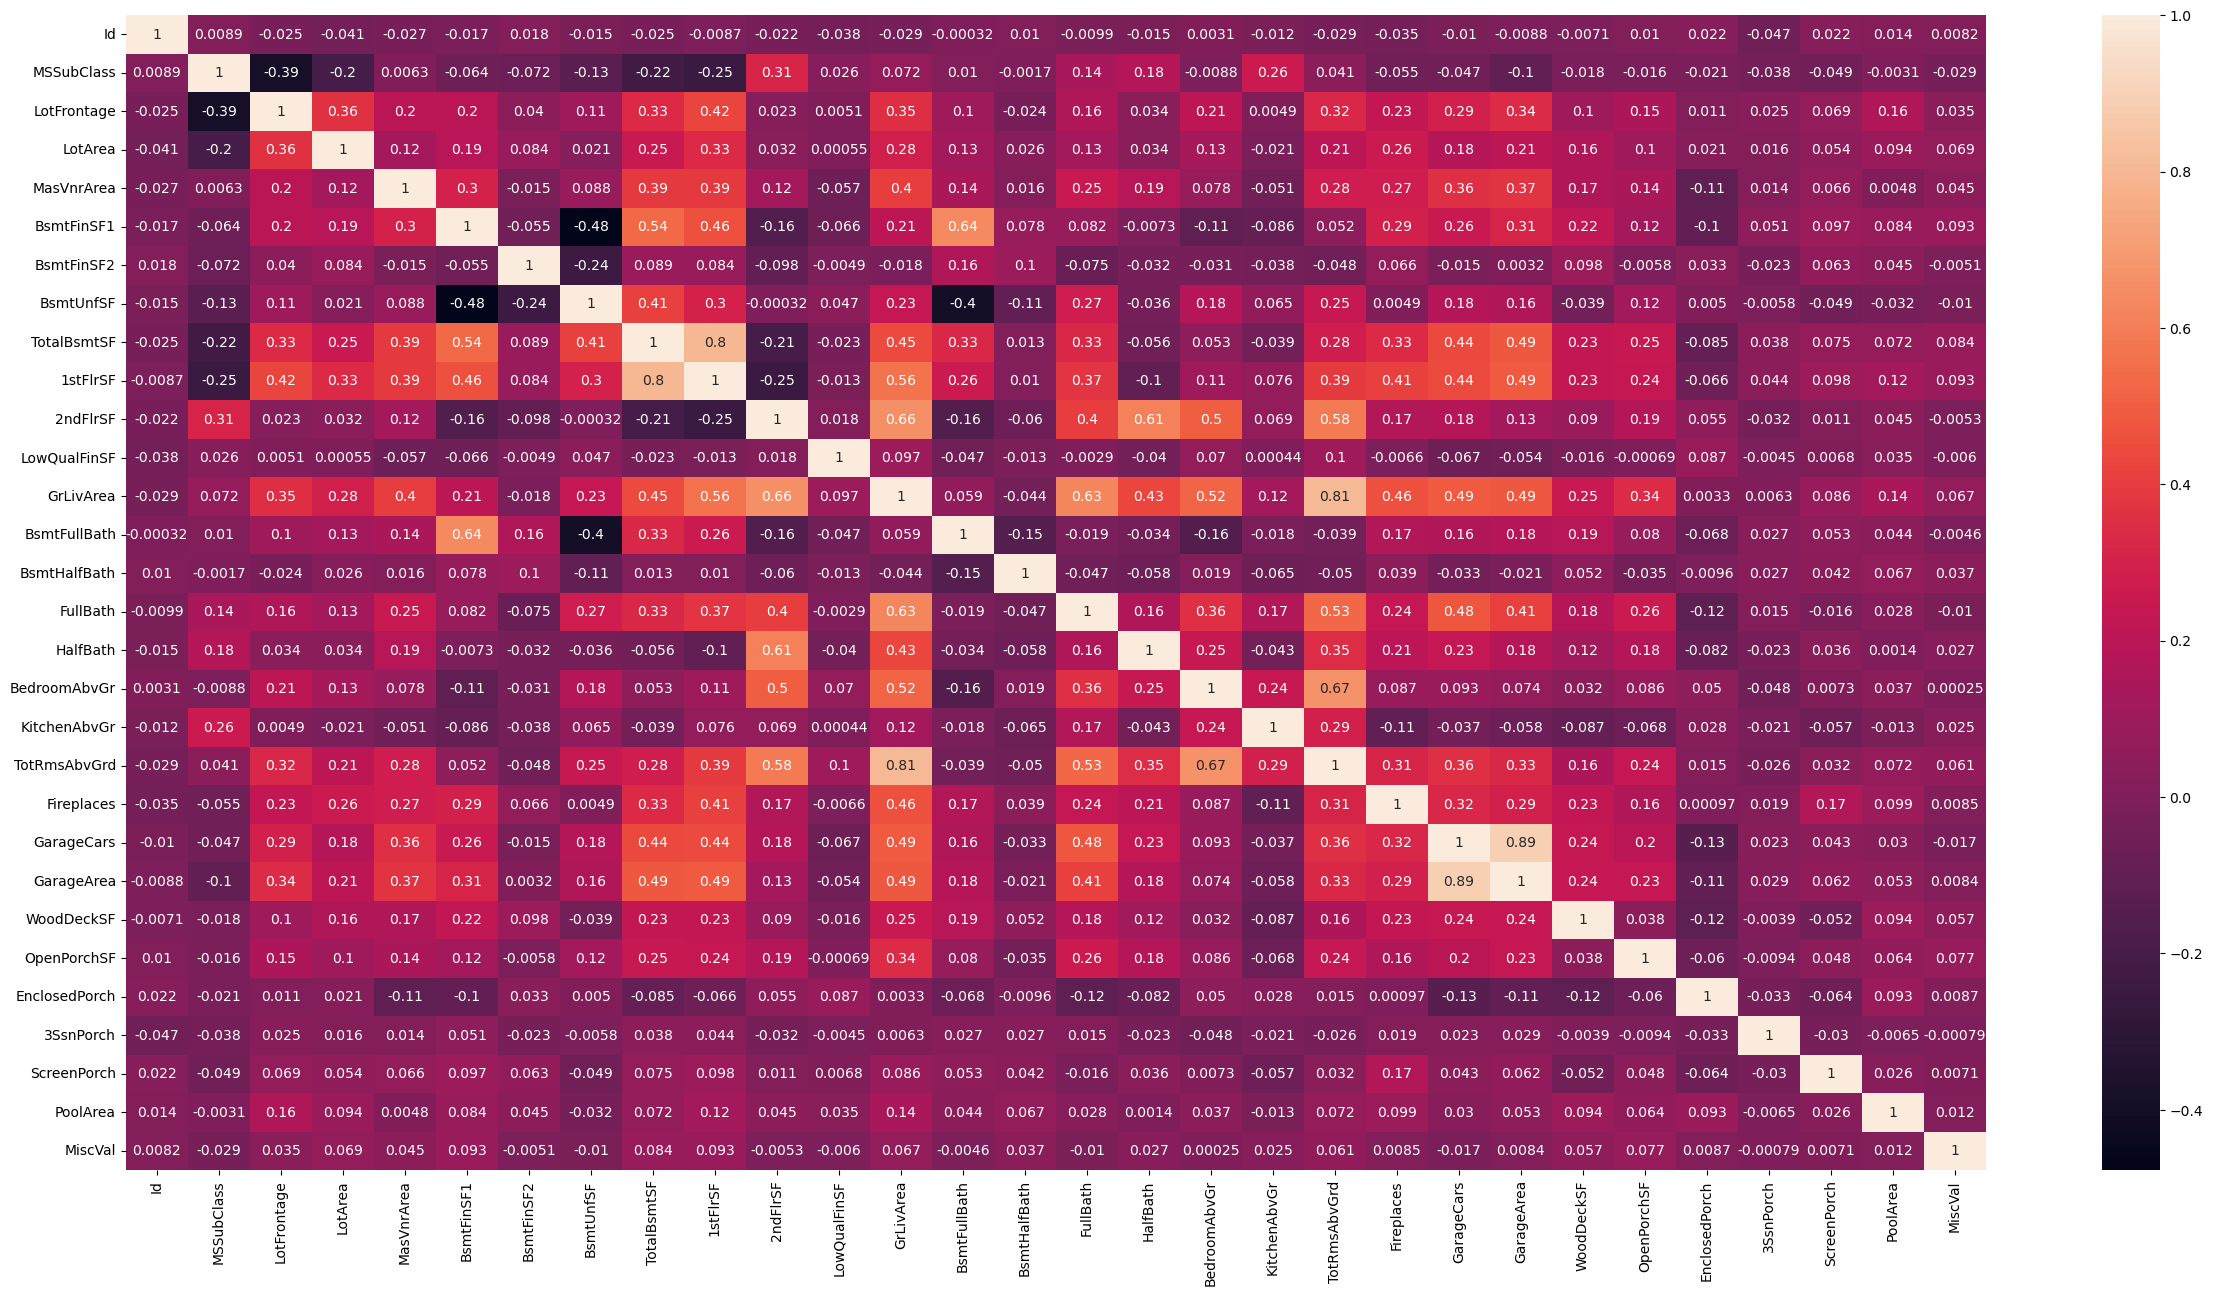

In [ ]:
#correlation analysis of numeric data
plt.figure(figsize=(30,15))
sns.heatmap(numcols.corr(),annot=True)

<Axes: >

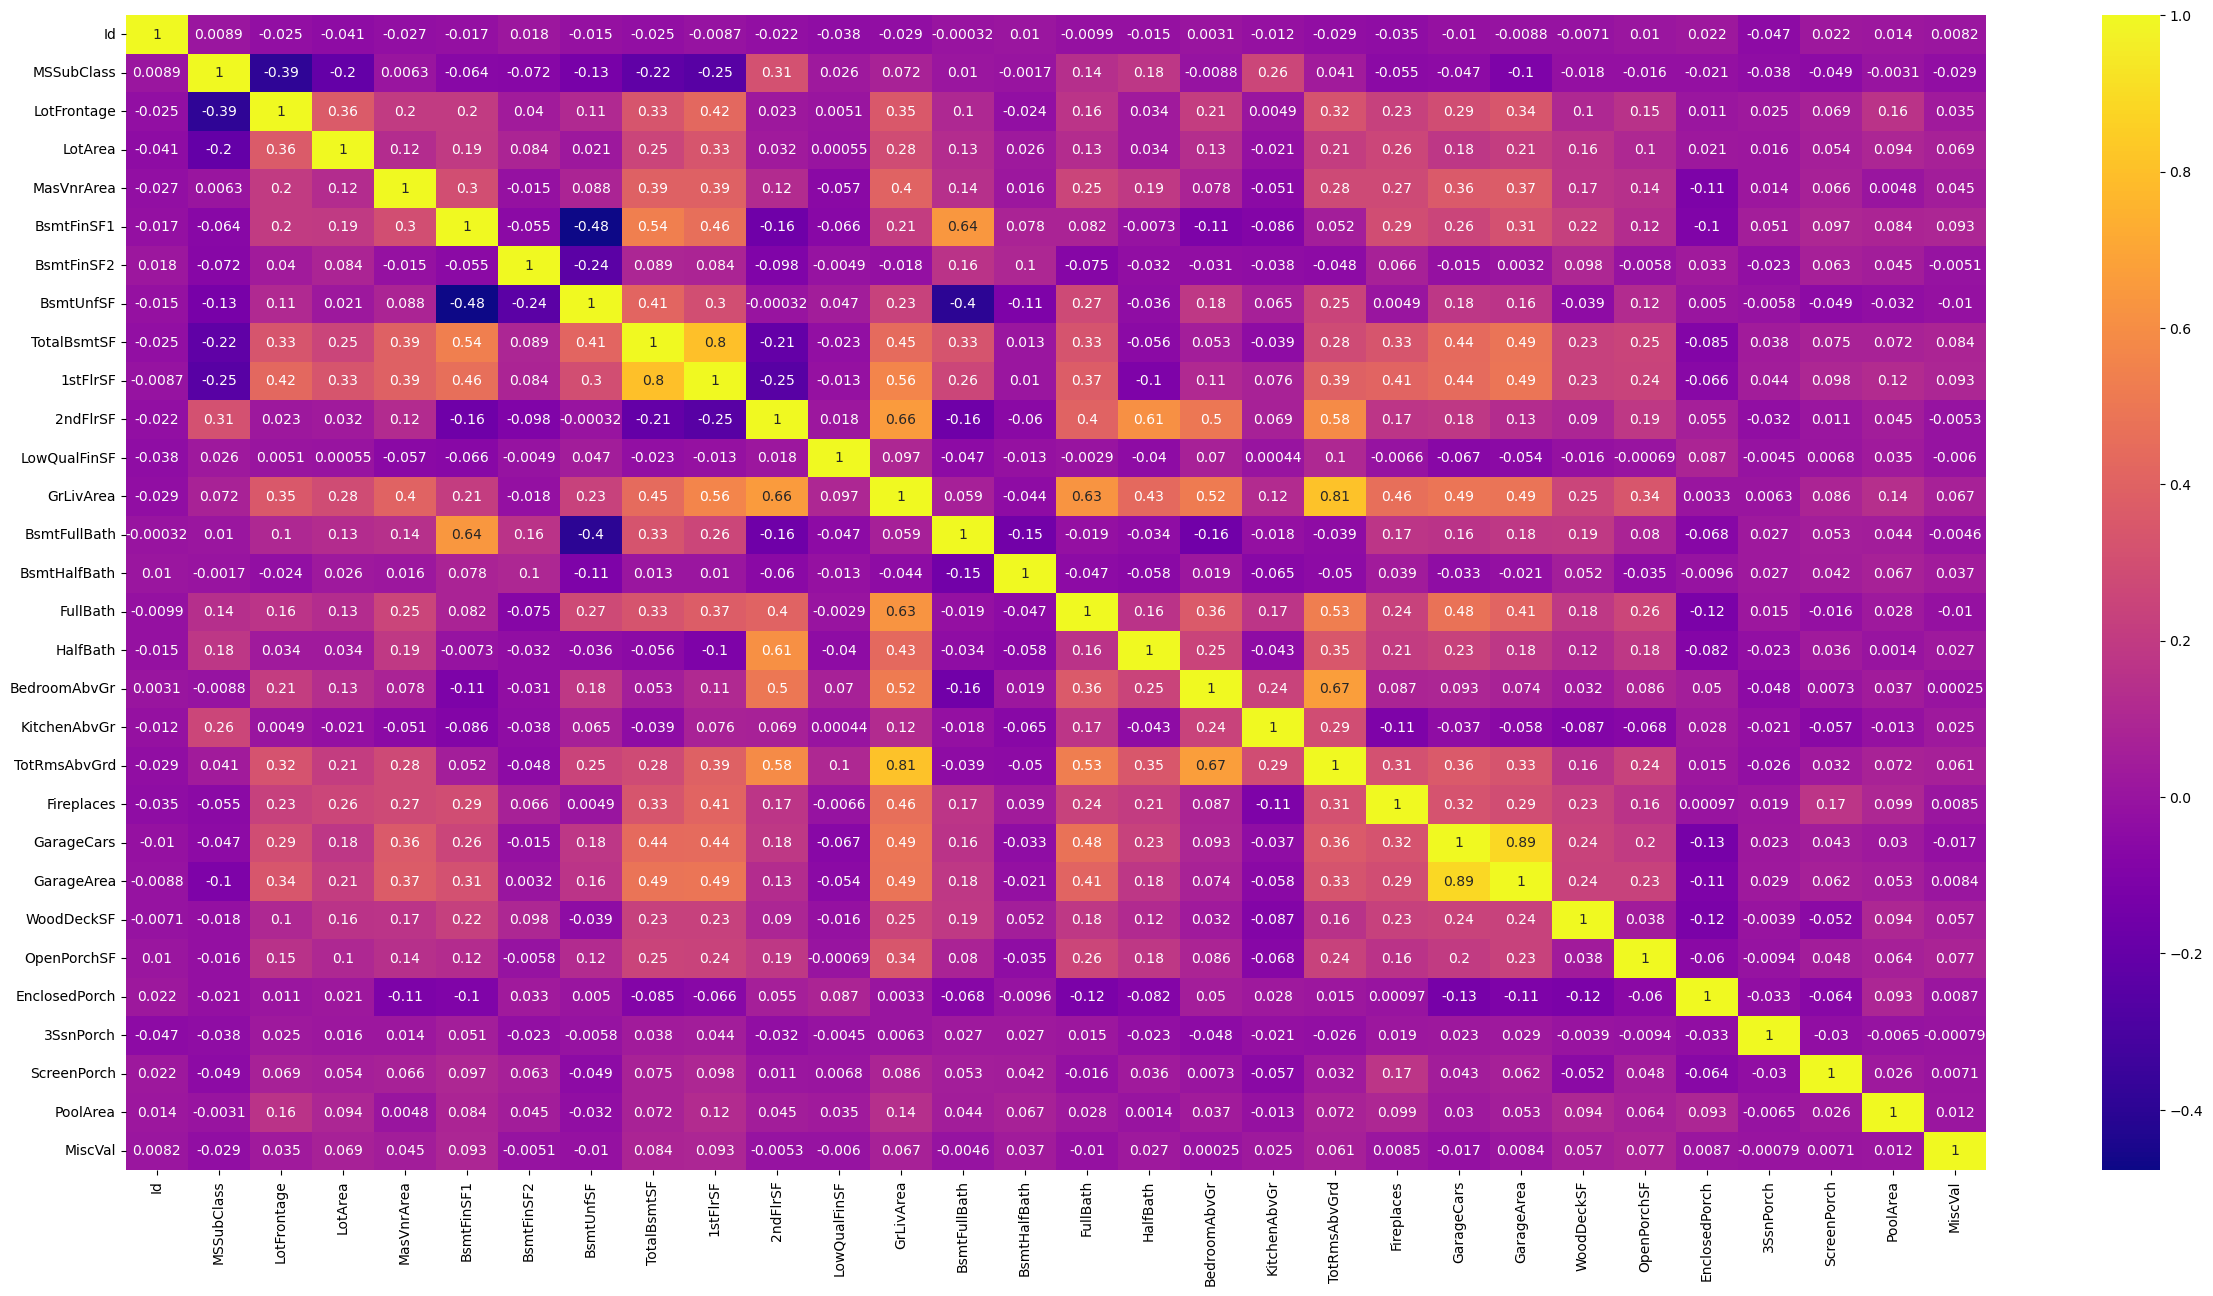

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(numcols.corr(),annot=True,cmap='plasma')

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
numcols['SalePrice']=objcols.SalePrice

In [ ]:
objcols=objcols.drop('SalePrice',axis=1)

In [ ]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#trainhp=pd.drop(trainhp.Alley,axis=1)

In [ ]:
#trainhp=pd.drop(trainhp.FireplaceQu,axis=1)

trainhp=pd.drop(trainhp.PoolQC,axis=1)
trainhp=pd.drop(trainhp.Fence,axis=1)
trainhp=pd.drop(trainhp.MiscFeature,axis=1)

**Session2 ML 01-08-2023**

In [ ]:
objcols.shape

(2919, 43)

In [ ]:
numcols.shape

(2919, 31)

# 28-08-2023

# dummy encode object cols and categorycols
objcols_dummy=pd.get_dummies(objcols)

objcols_dummy.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
object_dummy=objcols.apply(LabelEncoder().fit_transform)

In [ ]:
category_dummy=categeorycols.apply(LabelEncoder().fit_transform)

In [ ]:
combinedf_clean=pd.concat([numcols,object_dummy,category_dummy],axis=1)

In [ ]:
combinedf_clean.shape

(2919, 81)

In [ ]:
# split data back to train to test
housetrain_df=combinedf_clean[combinedf_clean.SalePrice!='test']
housetest_df=combinedf_clean[combinedf_clean.SalePrice=='test']

In [ ]:
# drop the dependent variable from test data
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [ ]:
housetest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   MasVnrArea     1459 non-null   float64
 5   BsmtFinSF1     1459 non-null   float64
 6   BsmtFinSF2     1459 non-null   float64
 7   BsmtUnfSF      1459 non-null   float64
 8   TotalBsmtSF    1459 non-null   float64
 9   1stFlrSF       1459 non-null   int64  
 10  2ndFlrSF       1459 non-null   int64  
 11  LowQualFinSF   1459 non-null   int64  
 12  GrLivArea      1459 non-null   int64  
 13  BsmtFullBath   1459 non-null   float64
 14  BsmtHalfBath   1459 non-null   float64
 15  FullBath       1459 non-null   int64  
 16  HalfBath       1459 non-null   int64  
 17  BedroomAbvGr   1459 non-null   int64  
 18  KitchenAbvGr 

In [ ]:
# split data into dependent variable(y) and independent variable(X)
y=housetrain_df.SalePrice
x=housetrain_df.drop(['Id','SalePrice'],axis=1)

In [ ]:
y=y.astype('int64')

<Axes: xlabel='SalePrice', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

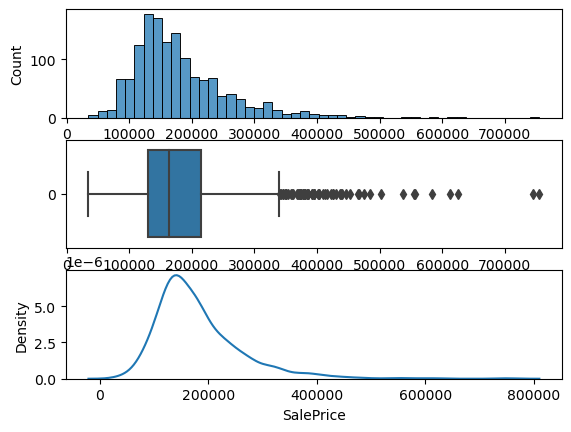

In [ ]:
#histogram,boxplot,density curve of y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.kdeplot(y,ax=ax[2])

<Axes: xlabel='SalePrice', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

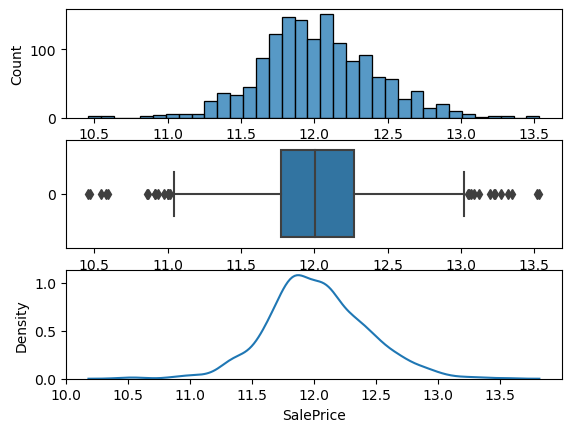

In [ ]:
#histogram,boxplot,density curve of y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(np.log1p(y),ax=ax[0])
sns.boxplot(np.log1p(y),orient='h',ax=ax[1])
sns.kdeplot(np.log1p(y),ax=ax[2])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
regmodel=reg.fit(x,np.log(y))

In [ ]:
regmodel.score(x,np.log(y)) # r_square

0.8877715795826588

In [ ]:
housetest_df=housetest_df.drop('Id',axis=1)

In [ ]:
regpredict=regmodel.predict(housetest_df)

In [ ]:
pd.DataFrame(np.exp(regpredict)).to_csv('reg.csv')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree=DecisionTreeRegressor(max_depth=6)

In [ ]:
treemodel=tree.fit(x,y)

In [ ]:
treemodel.score(x,y)

0.9066129275873688

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(tree,x,y)

array([0.71561352, 0.75268719, 0.80528335, 0.74688138, 0.57884563])

In [ ]:
np.mean([0.71561352, 0.75268719, 0.80528335, 0.74688138, 0.57884563])

0.719862214

In [ ]:
treepredict=treemodel.predict(housetest_df)

In [ ]:
pd.DataFrame(treepredict).to_csv('tree.csv')

In [ ]:
pd.DataFrame(treemodel.feature_importances_,x.columns).sort_values(by=0,ascending=False)

,0
OverallQual,0.698892
GrLivArea,0.106537
2ndFlrSF,0.040296
TotalBsmtSF,0.031058
BsmtFinSF1,0.019352
1stFlrSF,0.019240
GarageCars,0.013717
Neighborhood,0.012626
LotFrontage,0.007138
CentralAir,0.007052


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
las=Lasso()

In [ ]:
lasmodel=las.fit(x,y)

In [ ]:
lasmodel.score(x,y)

0.8523368355012891

In [ ]:
lasso_params={'alpha':[0.5,0.25,1,2,3,4,5,10,15]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_grid=GridSearchCV(estimator=Lasso(max_iter=3000,selection='random'),param_grid=lasso_params).fit(x,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+11, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+11, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_grid.best_estimator_

Lasso(alpha=15, max_iter=3000, selection='random')

In [ ]:
lasso_grid.best_score_

0.7998885006582717

In [ ]:
lasso_predict=lasso_grid.predict(housetest_df)

In [ ]:
pd.DataFrame(lasso_predict).to_csv('lasso.csv')

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rid=Ridge()

In [ ]:
ridmodel=rid.fit(x,y)

In [ ]:
ridmodel.score(x,y)

0.8521305302290303

In [ ]:
rid_predict=ridmodel.predict(housetest_df)

In [ ]:
pd.DataFrame(rid_predict).to_csv('rid.csv')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF=RandomForestRegressor(n_estimators=3000)

In [ ]:
rfmodel=RF.fit(x,y)

In [ ]:
rfmodel.score(x,y)

0.9823713491812275

In [ ]:
cross_val_score(RF,x,y)

array([0.87590798, 0.8462566 , 0.87457573, 0.88311702, 0.81761072])

In [ ]:
np.mean([0.87590798, 0.8462566 , 0.87457573, 0.88311702, 0.81761072])

0.85949361

In [ ]:
rfpredict=rfmodel.predict(housetest_df)

In [ ]:
pd.DataFrame(rfpredict).to_csv('rf.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm=GradientBoostingRegressor(n_estimators=3000)

In [ ]:
gmmodel=gbm.fit(x,y)

In [ ]:
gbm.score(x,y)

0.9999639711158624

In [ ]:
cross_val_score(gbm,x,y)

array([0.91103841, 0.84305525, 0.90537834, 0.89691904, 0.90093657])

In [ ]:
np.mean([0.91103841, 0.84305525, 0.90537834, 0.89691904, 0.90093657])

0.8914655220000001

In [ ]:
gbmpredict=gmmodel.predict(housetest_df)

In [ ]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
el=ElasticNet(alpha=90,max_iter=8000)

In [ ]:
elmodel=el.fit(x,y)

In [ ]:
elmodel.score(x,y)

0.7605481427222182

In [ ]:
rfpredict=elmodel.predict(housetest_df)

In [ ]:
pd.DataFrame(rfpredict).to_csv('el.csv')

In [ ]:
cross_val_score(el,x,y)

array([0.79559838, 0.75264743, 0.80879966, 0.76896685, 0.54853002])

In [ ]:
np.mean([0.79559838, 0.75264743, 0.80879966, 0.76896685, 0.54853002])

0.734908468

from sklearn.preprocessing import StandardScaler